In [27]:
%pip install pandas numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('churn.csv')
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [8]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


![img](meta_data.png)

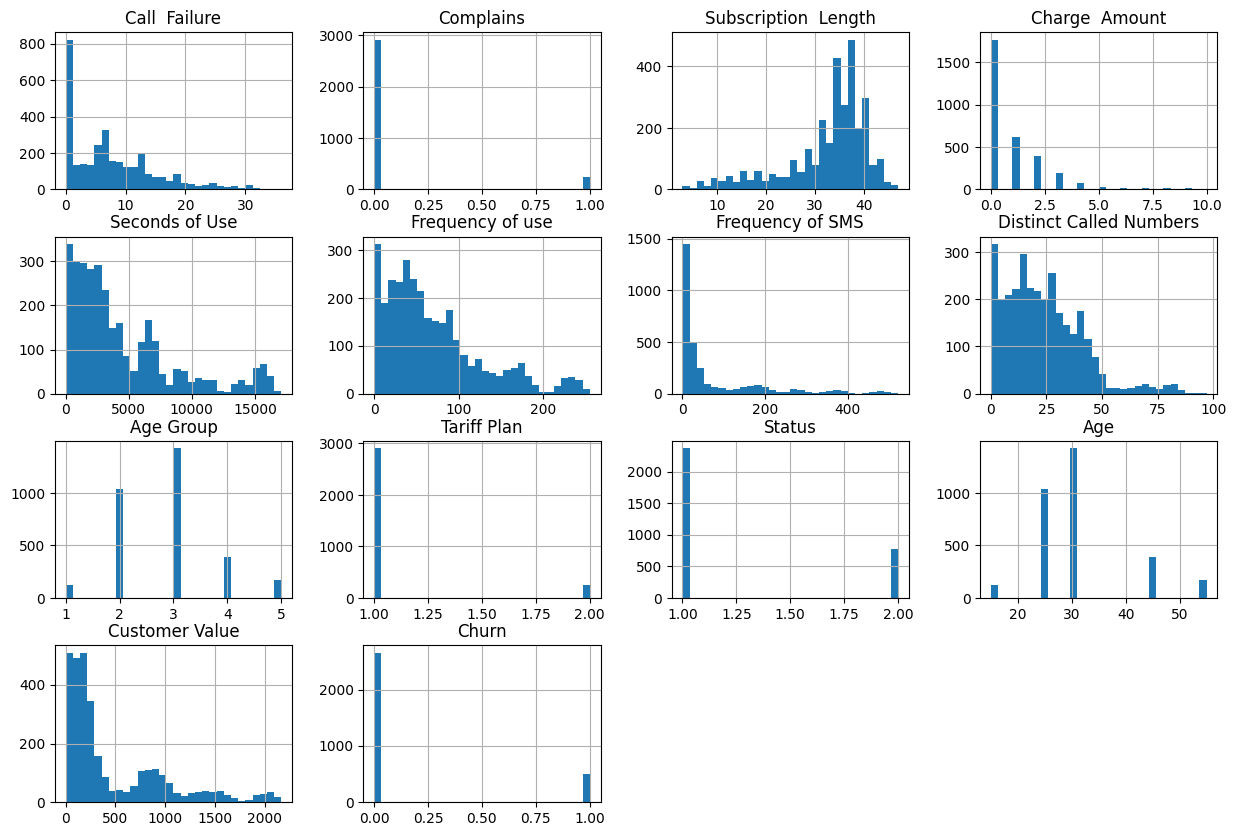

In [10]:
# plot histograms for each column

import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.show()

### observations
1. No missing values
2. Tariff plan has to go through one hot encoding (1: pay as you go, 2: contractual)
3. Status has to go through one hot encoding
4. Make the Churn column the first column
5. Remove the header



In [17]:
# create two columns named : pay_as_you_go and contract
df['pay_as_you_go'] = np.where(df['Tariff Plan'] == 1, 1, 0)
df['contract'] = np.where(df['Tariff Plan'] == 2, 1, 0)
# drop Tariff Plan
df = df.drop('Tariff Plan', axis=1)


In [19]:
# create two columns named: active and non_active
df['active'] = np.where(df['Status'] == 1, 1, 0)
df['non_active'] = np.where(df['Status'] == 0, 1, 0)
df = df.drop('Status', axis=1)


In [21]:
# move the Churn column to the start
churn = df.pop('Churn')
df.insert(0, 'Churn', churn)


In [26]:
# number of Churn 1 and 0
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

#### The data set is imbalanced. 
1. Need a stratified sampling technique


In [34]:
from sklearn.model_selection import train_test_split



# --- Step 1: Separate features and target ---
y = df["Churn"]
X = df.drop("Churn", axis=1)

# --- Step 2: First split into train (70%) and temp (30%) ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# --- Step 3: Split temp into validation (15%) and test (15%) ---
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

# --- Step 4: Combine labels and features, with label first ---
train = pd.concat([y_train.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
validation = pd.concat([y_val.reset_index(drop=True), X_val.reset_index(drop=True)], axis=1)
test = pd.concat([y_test.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

# --- Step 5: Save to CSV (no headers, no index) ---
# base_dir = "data"  # change this to your directory
# train.to_csv(f"{base_dir}/train/train.csv", header=False, index=False)
# validation.to_csv(f"{base_dir}/validation/validation.csv", header=False, index=False)
# test.to_csv(f"{base_dir}/test/test.csv", header=False, index=False)

# --- Optional: check splits ---
print("Train size:", train.shape)
print("Validation size:", validation.shape)
print("Test size:", test.shape)
print("\nChurn distribution:")
print("Train:\n", train['Churn'].value_counts(normalize=True))
print("Validation:\n", validation['Churn'].value_counts(normalize=True))
print("Test:\n", test['Churn'].value_counts(normalize=True))


Train size: (2205, 16)
Validation size: (472, 16)
Test size: (473, 16)

Churn distribution:
Train:
 Churn
0    0.84263
1    0.15737
Name: proportion, dtype: float64
Validation:
 Churn
0    0.84322
1    0.15678
Name: proportion, dtype: float64
Test:
 Churn
0    0.843552
1    0.156448
Name: proportion, dtype: float64


In [32]:
X_test

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,pay_as_you_go,contract,active,non_active
2034,1,0,32,2,6660,110,264,31,2,25,1492.650,0,1,1,0
433,23,0,28,3,15895,230,0,75,2,25,725.625,1,0,1,0
722,21,0,33,0,765,46,7,14,2,25,67.995,1,0,0,0
283,30,1,37,4,16335,248,15,86,2,25,813.735,1,0,1,0
2628,5,1,38,0,305,6,7,2,3,30,40.440,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,16,0,44,2,4583,74,18,41,1,15,355.135,1,0,1,0
2952,21,0,40,2,3468,77,374,26,3,30,1637.800,1,0,1,0
883,31,1,32,4,16785,249,8,80,2,25,802.530,1,0,1,0
44,2,0,18,0,1695,26,28,14,2,25,203.445,1,0,1,0


In [36]:
df = pd.read_csv('churn.csv')
# create two columns named : pay_as_you_go and contract
df['pay_as_you_go'] = np.where(df['Tariff Plan'] == 1, 1, 0)
df['contract'] = np.where(df['Tariff Plan'] == 2, 1, 0)
# drop Tariff Plan
df = df.drop('Tariff Plan', axis=1)

# create two columns named: active and non_active
df['active'] = np.where(df['Status'] == 1, 1, 0)
df['non_active'] = np.where(df['Status'] == 0, 1, 0)
df = df.drop('Status', axis=1)

# move the Churn column to the start
churn = df.pop('Churn')
df.insert(0, 'Churn', churn)

from sklearn.model_selection import train_test_split

# --- Step 1: Separate features and target ---
y = df["Churn"]
X = df.drop("Churn", axis=1)

# --- Step 2: First split into train (70%) and temp (30%) ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# --- Step 3: Split temp into validation (15%) and test (15%) ---
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

# --- Step 4: Combine labels and features, with label first ---
train = pd.concat([y_train.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
churn = train.pop('Churn')
train.insert(0, 'Churn', churn)
validation = pd.concat([y_val.reset_index(drop=True), X_val.reset_index(drop=True)], axis=1)
churn = validation.pop('Churn')
validation.insert(0, 'Churn', churn)
test = pd.concat([y_test.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

churn = test.pop('Churn')
test.insert(0, 'Churn', churn)

# --- Step 5: Save to CSV (no headers, no index) ---
# base_dir = "data"  # change this to your directory
# train.to_csv(f"{base_dir}/train/train.csv", header=False, index=False)
# validation.to_csv(f"{base_dir}/validation/validation.csv", header=False, index=False)
# test.to_csv(f"{base_dir}/test/test.csv", header=False, index=False)

# --- Optional: check splits ---
print("Train size:", train.shape)
print("Validation size:", validation.shape)
print("Test size:", test.shape)
print("\nChurn distribution:")
print("Train:\n", train['Churn'].value_counts(normalize=True))
print("Validation:\n", validation['Churn'].value_counts(normalize=True))
print("Test:\n", test['Churn'].value_counts(normalize=True))




Train size: (2205, 16)
Validation size: (472, 16)
Test size: (473, 16)

Churn distribution:
Train:
 Churn
0    0.84263
1    0.15737
Name: proportion, dtype: float64
Validation:
 Churn
0    0.84322
1    0.15678
Name: proportion, dtype: float64
Test:
 Churn
0    0.843552
1    0.156448
Name: proportion, dtype: float64


In [ ]:
import os
import tempfile
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    
    base_dir = "/opt/ml/processing"
    #Read Data
    df = pd.read_csv(
        f"{base_dir}/input/churn.csv.csv"
    )
   
    # create two columns named : pay_as_you_go and contract
    df['pay_as_you_go'] = np.where(df['Tariff Plan'] == 1, 1, 0)
    df['contract'] = np.where(df['Tariff Plan'] == 2, 1, 0)
    # drop Tariff Plan
    df = df.drop('Tariff Plan', axis=1)

    # create two columns named: active and non_active
    df['active'] = np.where(df['Status'] == 1, 1, 0)
    df['non_active'] = np.where(df['Status'] == 0, 1, 0)
    df = df.drop('Status', axis=1)

    # move the Churn column to the start
    churn = df.pop('Churn')
    df.insert(0, 'Churn', churn)

    # Data Splitting
    # --- Step 1: Separate features and target ---
    y = df["Churn"]
    X = df.drop("Churn", axis=1)

    # --- Step 2: First split into train (70%) and temp (30%) ---
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y,
        test_size=0.3,
        stratify=y,
        random_state=42
    )

    # --- Step 3: Split temp into validation (15%) and test (15%) ---
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.5,
        stratify=y_temp,
        random_state=42
    )

    # --- Step 4: Combine labels and features, with label first ---
    train = pd.concat([y_train.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
    churn = train.pop('Churn')
    train.insert(0, 'Churn', churn)
    validation = pd.concat([y_val.reset_index(drop=True), X_val.reset_index(drop=True)], axis=1)
    churn = validation.pop('Churn')
    validation.insert(0, 'Churn', churn)
    test = pd.concat([y_test.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

    churn = test.pop('Churn')
    test.insert(0, 'Churn', churn)

    # --- Step 5: Save to CSV (no headers, no index) ---
    train.to_csv(f"{base_dir}/train/train.csv", header=False, index=False)
    validation.to_csv(f"{base_dir}/validation/validation.csv", header=False, index=False)
    test.to_csv(f"{base_dir}/test/test.csv", header=False, index=False)

    # --- Optional: check splits ---
    # print("Train size:", train.shape)
    # print("Validation size:", validation.shape)
    # print("Test size:", test.shape)
    # print("\nChurn distribution:")
    # print("Train:\n", train['Churn'].value_counts(normalize=True))
    # print("Validation:\n", validation['Churn'].value_counts(normalize=True))
    # print("Test:\n", test['Churn'].value_counts(normalize=True))


